In [1]:
# importing required libraries

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [2]:
# reading the data

df=pd.read_csv("/content/crop_yield.csv")

In [3]:
df

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [4]:
# info of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
 7   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(3), object(2)
memory usage: 1.7+ MB


In [5]:
# describing the dataframe using transpose

df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,28242.0,NaN,NaN,NaN,14120.5,8152.907488,0.0,7060.25,14120.5,21180.75,28241.0
Area,28242,101,India,4048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Item,28242,10,Potatoes,4276,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,28242.0,NaN,NaN,NaN,2001.544296,7.051905,1990.0,1995.0,2001.0,2008.0,2013.0
hg/ha_yield,28242.0,NaN,NaN,NaN,77053.332094,84956.612897,50.0,19919.25,38295.0,104676.75,501412.0
average_rain_fall_mm_per_year,28242.0,NaN,NaN,NaN,1149.05598,709.81215,51.0,593.0,1083.0,1668.0,3240.0
pesticides_tonnes,28242.0,NaN,NaN,NaN,37076.909344,59958.784665,0.04,1702.0,17529.44,48687.88,367778.0
avg_temp,28242.0,NaN,NaN,NaN,20.542627,6.312051,1.3,16.7025,21.51,26.0,30.65


In [6]:
# dropping unwanted column

df.drop("Unnamed: 0", axis=1,inplace=True)
df

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...
28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


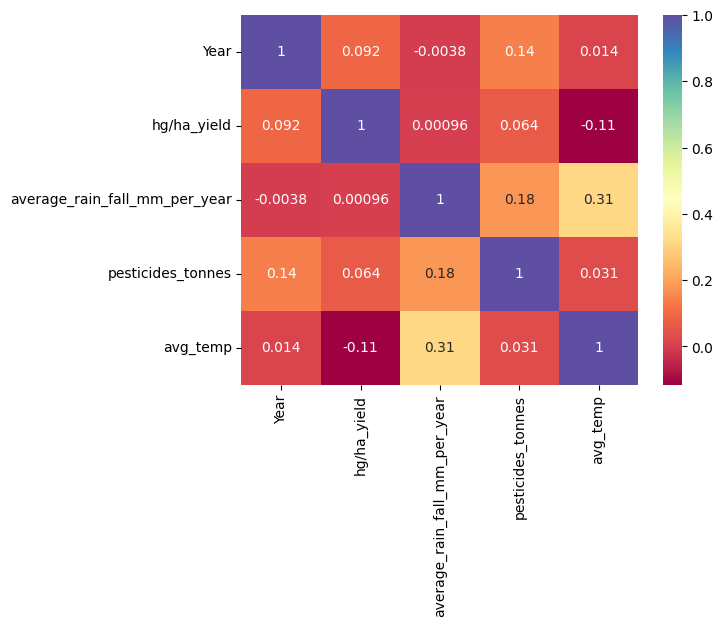

In [7]:
# Heatmap for checking the correlation among features

sns.heatmap(df.corr() , annot= True , cmap='Spectral')
plt.show()

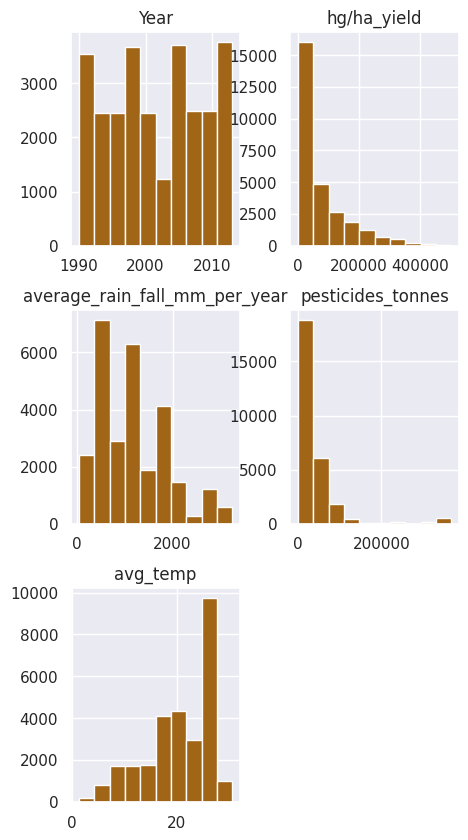

In [8]:
sns.set(palette='BrBG')
df.hist(figsize=(5,10))
plt.title("Distribution of Features")
plt.show()

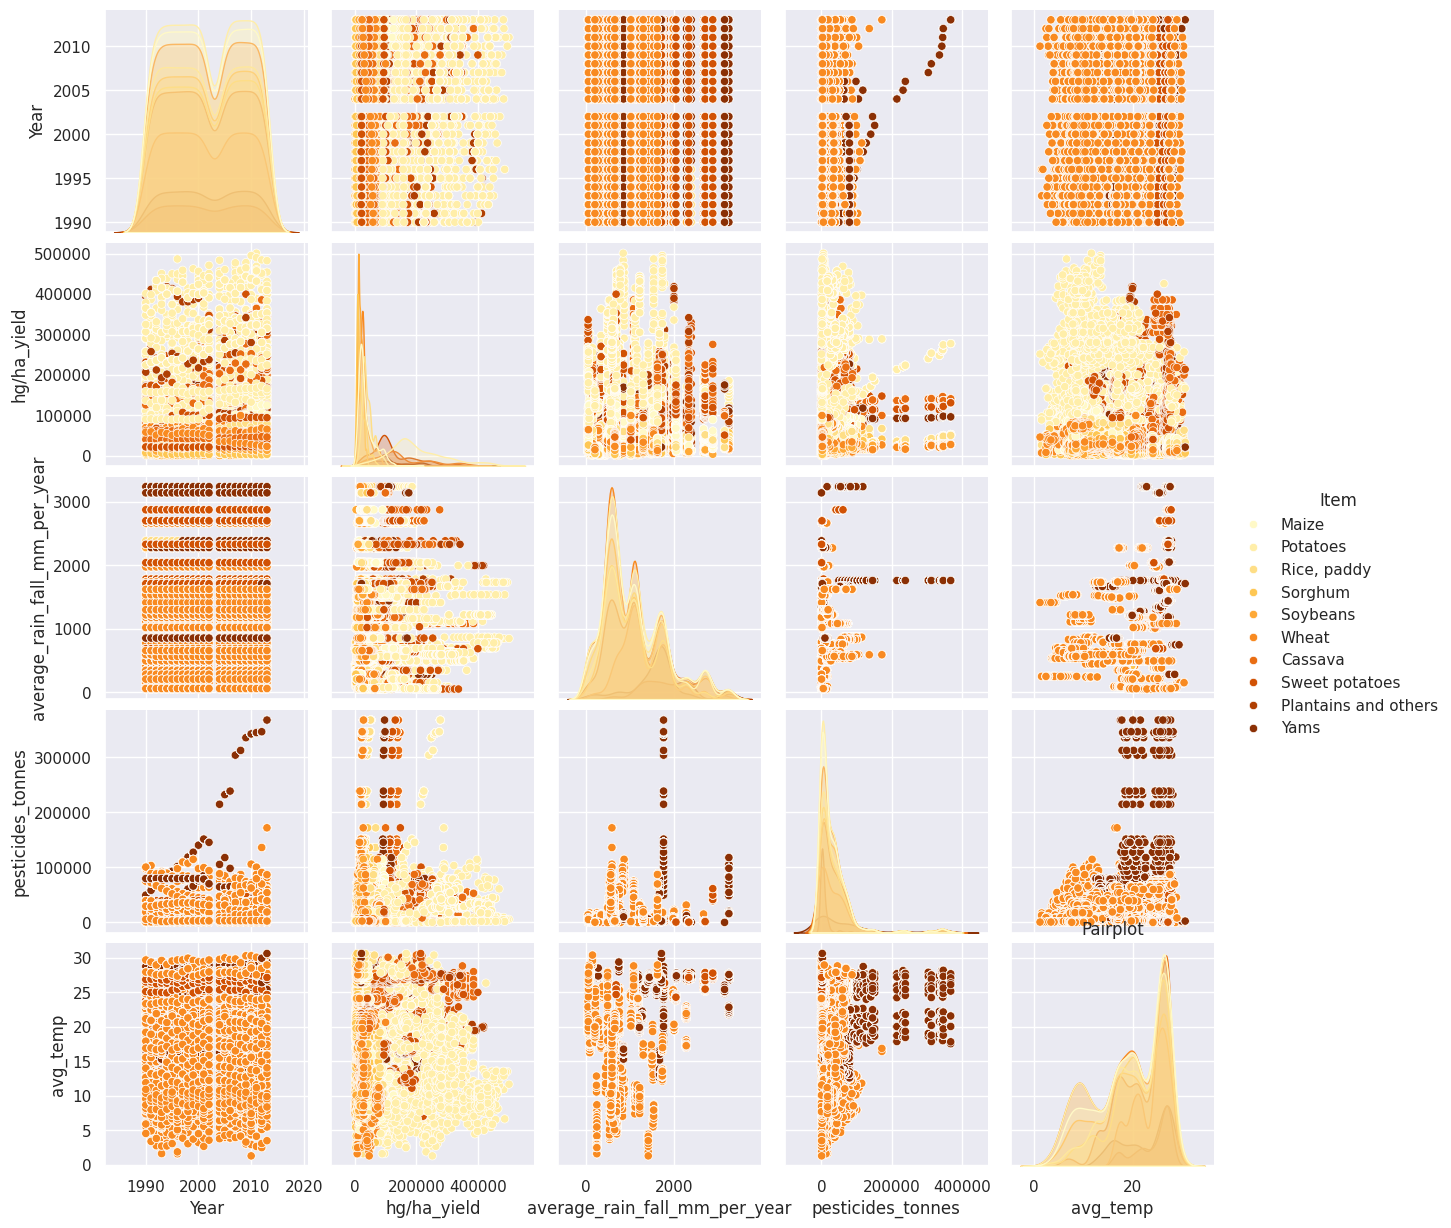

In [9]:
sns.pairplot(data=df,hue='Item',kind='scatter',palette='YlOrBr')
plt.title("Pairplot")
plt.show()

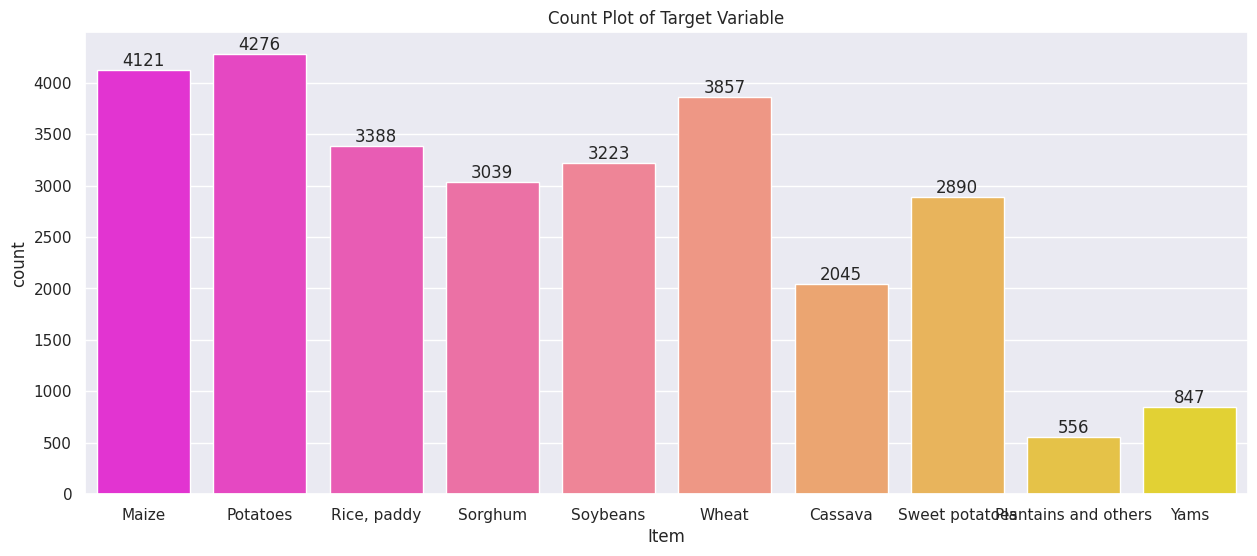

In [10]:
plt.figure(figsize = (15,6))
ax = sns.countplot(x = df['Item'], palette='spring')
for label in ax.containers:
    ax.bar_label(label)

plt.title("Count Plot of Target Variable")
plt.show()

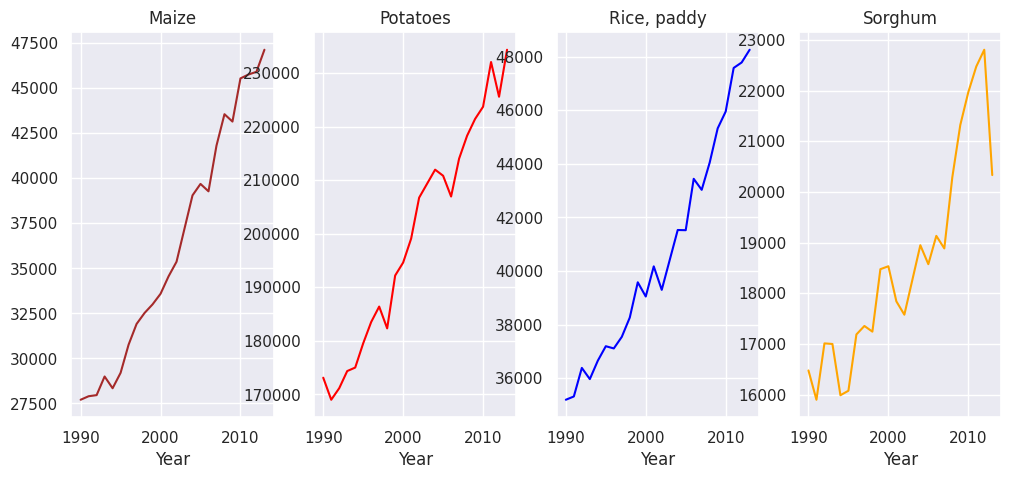

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(141)
df2=df[df['Item']=='Maize']
df2.groupby('Year')['hg/ha_yield'].mean().plot(color='brown')
plt.title("Maize")

plt.subplot(142)
df3=df[df['Item']=='Potatoes']
df3.groupby('Year')['hg/ha_yield'].mean().plot(color='red')
plt.title("Potatoes")

plt.subplot(143)
df4=df[df['Item']=='Rice, paddy']
df4.groupby('Year')['hg/ha_yield'].mean().plot(color='blue')
plt.title("Rice, paddy")


plt.subplot(144)
df5=df[df['Item']=='Sorghum']
df5.groupby('Year')['hg/ha_yield'].mean().plot(color='orange')
plt.title("Sorghum")

plt.show()

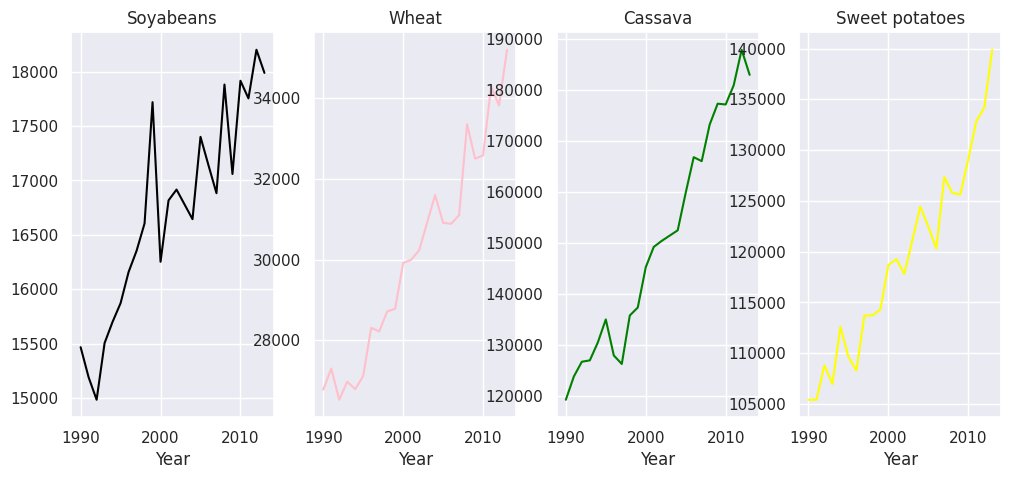

In [12]:
plt.figure(figsize=(12,5))

plt.subplot(141)
df2=df[df['Item']=='Soybeans']
df2.groupby('Year')['hg/ha_yield'].mean().plot(color='black')
plt.title("Soyabeans")

plt.subplot(142)
df3=df[df['Item']=='Wheat']
df3.groupby('Year')['hg/ha_yield'].mean().plot(color='pink')
plt.title("Wheat")

plt.subplot(143)
df4=df[df['Item']=='Cassava']
df4.groupby('Year')['hg/ha_yield'].mean().plot(color='green')
plt.title("Cassava")

plt.subplot(144)
df5=df[df['Item']=='Sweet potatoes']
df5.groupby('Year')['hg/ha_yield'].mean().plot(color='yellow')
plt.title("Sweet potatoes")

plt.show()

In [13]:
dk=df.groupby(['Area','Item'])['hg/ha_yield'].mean().to_frame()
dk.sort_values(by=['hg/ha_yield'],ascending=False)

,,hg/ha_yield
Area,Item,
Belgium,Potatoes,448891.538462
New Zealand,Potatoes,436177.826087
Netherlands,Potatoes,433548.913043
United Kingdom,Potatoes,406131.695652
Switzerland,Potatoes,400808.913043
...,...,...
Angola,Sorghum,2926.769231
Namibia,Sorghum,2684.347826
Niger,Sorghum,2592.913043


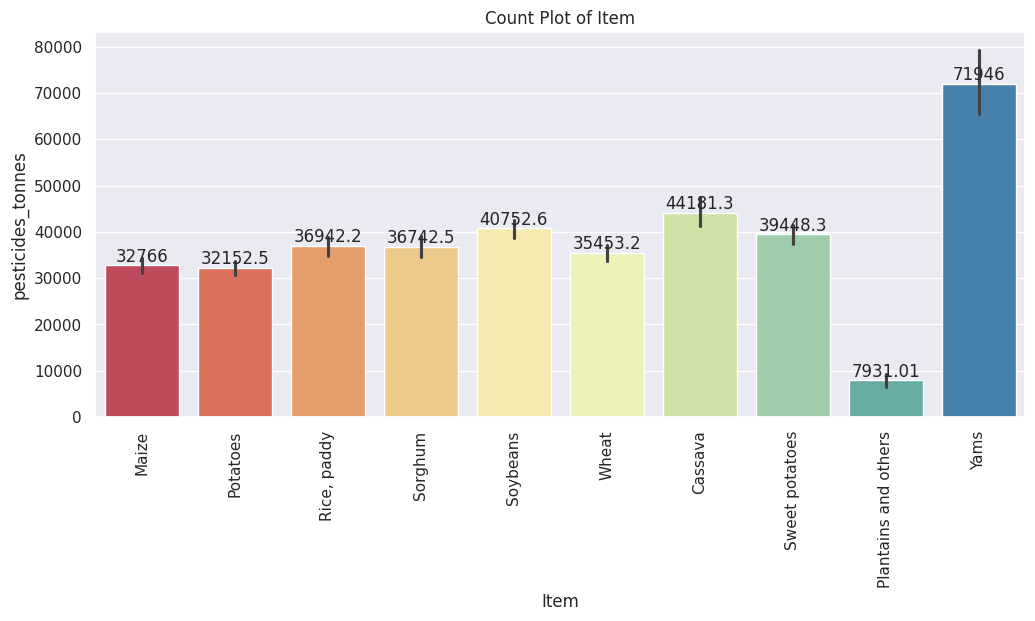

In [14]:
plt.figure(figsize=(12,5))

ax = sns.barplot(data=df, x = df.Item, y = df['pesticides_tonnes'],palette='Spectral')
for label in ax.containers:
    ax.bar_label(label)
plt.xticks(rotation=90)
plt.title("Count Plot of Item")
plt.show()

In [15]:
df['Item'].unique()

array(['Maize', 'Potatoes', 'Rice, paddy', 'Sorghum', 'Soybeans', 'Wheat',
       'Cassava', 'Sweet potatoes', 'Plantains and others', 'Yams'],
      dtype=object)

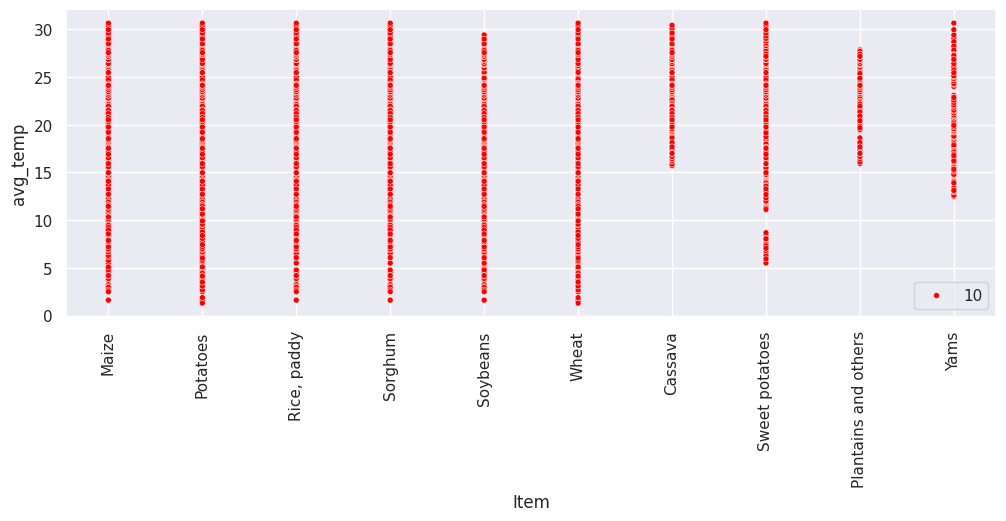

In [16]:
plt.figure(figsize=(12,4))

sns.scatterplot(x = 'Item', y = 'avg_temp', data = df,size=10,color='r')
plt.xticks(rotation=90);

In [17]:
# Mapping the variable

df['Item'] = df['Item'].map({'Plantains and others':0, 'Potatoes':1, 'Maize':2, 'Wheat':3, 'Sorghum':4,
                             'Rice, paddy':5, 'Sweet potatoes':6,  'Soybeans':7, 'Cassava':8, 'Yams':9})

In [18]:
X = df.drop(['hg/ha_yield', 'Area', 'Year'], axis=1)
y = df['hg/ha_yield']

In [19]:
# Splitting data into train data and test data using 'train_test_split'

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
X

,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,2,1485.0,121.00,16.37
1,1,1485.0,121.00,16.37
2,5,1485.0,121.00,16.37
3,4,1485.0,121.00,16.37
4,7,1485.0,121.00,16.37
...,...,...,...,...
28237,5,657.0,2550.07,19.76
28238,4,657.0,2550.07,19.76
28239,7,657.0,2550.07,19.76
28240,6,657.0,2550.07,19.76


***Linear Regression***

In [21]:
lin_model = LinearRegression()
lin_model.fit(x_train, y_train)
y_pred_lin = lin_model.predict(x_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_lin))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, y_pred_lin)))
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred_lin))
print("R2 Score: ",r2_score(y_test, y_pred_lin))

Mean Squared Error:  6939937667.667091
Root Mean Squared Error:  83306.28828406107
Mean Absolute Error:  63980.491981627834
R2 Score:  0.04325179088030506


***XGBRegressor***

In [22]:
xgb_reg = XGBRegressor(max_depth=10, learning_rate=0.5)
xgb_reg.fit(x_train, y_train)
y_pred_xgbr = xgb_reg.predict(x_test)

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred_xgbr))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, y_pred_xgbr)))
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred_xgbr))
print("R2 Score: ",r2_score(y_test, y_pred_xgbr))

Mean Squared Error:  263433448.9745776
Root Mean Squared Error:  16230.633042940057
Mean Absolute Error:  6750.806686674859
R2 Score:  0.9636827457827332


***Random Forest Regressor***

In [23]:
forest = RandomForestRegressor()
forest.fit(x_train, y_train)
y_pred_forest = forest.predict(x_test)

print("Mean Squared Error: ", mean_squared_error(y_test, y_pred_forest))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, y_pred_forest)))
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred_forest))
print("R2 Score: ",r2_score(y_test, y_pred_forest))

Mean Squared Error:  205492192.99603713
Root Mean Squared Error:  14334.998883712447
Mean Absolute Error:  5962.999331973734
R2 Score:  0.9716705974820193


In [24]:
from sklearn.model_selection import RandomizedSearchCV

***XGBRegressor with RandomizedSearchCV***

In [25]:
params_xgb_reg = {
    'max_depth': [4,6,8,10],
    'learning_rate': [0.1, 0.3, 0.5, 0.7],
    'n_estimators': [50, 100, 300, 500, 1000]
}

rcv_xgb_reg = RandomizedSearchCV(estimator=XGBRegressor(),
                                 param_distributions = params_xgb_reg, cv=5)
rcv_xgb_reg.fit(x_train, y_train)
y_pred_reg = rcv_xgb_reg.predict(x_test)

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred_reg))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, y_pred_reg)))
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred_reg))
print("R2 Score: ",r2_score(y_test, y_pred_reg))

Mean Squared Error:  214492629.60925883
Root Mean Squared Error:  14645.566892724188
Mean Absolute Error:  6695.142533718115
R2 Score:  0.9704297863935978


***RandomForestRegressor with RandomizedSearchCV***

In [26]:
params_forest = {
    'max_depth': [4,6,8,10],
    'n_estimators': [50, 100, 150, 200],
    'min_samples_split': [2, 3, 4, 5]
}
rcv_forest = RandomizedSearchCV(estimator=RandomForestRegressor(),
                                 param_distributions = params_forest, cv=5)
rcv_forest.fit(x_train, y_train)
y_pred_forest = rcv_forest.predict(x_test)

print("Mean Squared Error: ",mean_squared_error(y_test, y_pred_forest))
print("Root Mean Squared Error: ",np.sqrt(mean_squared_error(y_test, y_pred_forest)))
print("Mean Absolute Error: ",mean_absolute_error(y_test, y_pred_forest))
print("R2 Score: ",r2_score(y_test, y_pred_forest))

Mean Squared Error:  323314895.56957614
Root Mean Squared Error:  17980.959250539894
Mean Absolute Error:  10497.92951101561
R2 Score:  0.955427417056053


***R2 Score for the models from RandomizedSearchCV***

In [27]:
r2_xgb_regressor = r2_score(y_test, y_pred_reg)
r2_forest = r2_score(y_test, y_pred_forest)

Scores = {'XGBRegressor': r2_xgb_regressor, 'RandomForestRegressor': r2_forest}
new_d = pd.DataFrame(data=Scores, index=[0,1])

dd = pd.DataFrame({"Model": ['XGBRegressor', 'RandomForestRegressor'],
                  "AUC Score": [r2_xgb_regressor*100, r2_forest*100]
                  })
dd

,Model,AUC Score
0,XGBRegressor,97.042979
1,RandomForestRegressor,95.542742


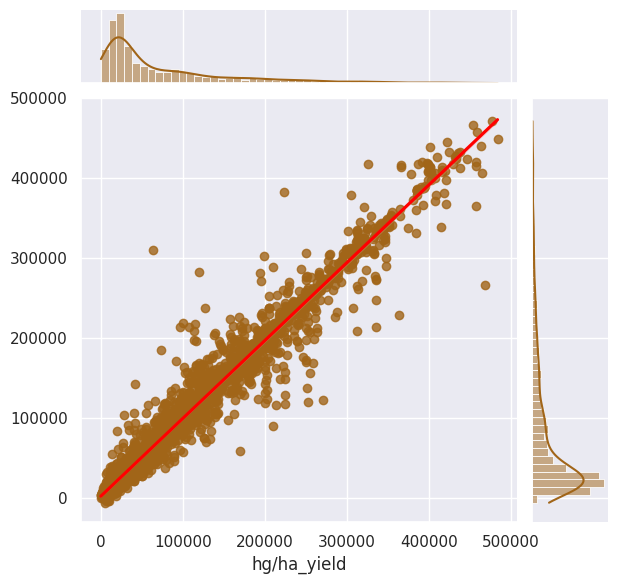

In [28]:
sns.jointplot(x=y_test, y = y_pred_reg, kind='reg', line_kws={'color':'red'} )
plt.show()

In [29]:
# Testing the Model by giving a sample data

new_sample = np.array([[2, 1485.0, 121.0, 16.37]])
#new_sample2 = np.array([[1, 1485.0, 121.0, 16.37]])
new_pred = rcv_xgb_reg.predict(new_sample)
print('Predicted Status:', (new_pred))

Predicted Status: [25855.928]
